<a href="https://colab.research.google.com/github/GitExplorer88/Assesment-Project/blob/main/Project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading and Basic imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Overview Of Dataset

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/current/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=df.drop('customerID',axis=1)

In [ ]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#Data Cleaning

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df = df.dropna(subset=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
count=0
for i in df.columns:
  v=df[i].unique()
  if len(v)<10:
    count+=1
    print(f"({count})Unique values of {i} column is {v}")

(1)Unique values of gender column is ['Female' 'Male']
(2)Unique values of SeniorCitizen column is [0 1]
(3)Unique values of Partner column is ['Yes' 'No']
(4)Unique values of Dependents column is ['No' 'Yes']
(5)Unique values of PhoneService column is ['No' 'Yes']
(6)Unique values of MultipleLines column is ['No phone service' 'No' 'Yes']
(7)Unique values of InternetService column is ['DSL' 'Fiber optic' 'No']
(8)Unique values of OnlineSecurity column is ['No' 'Yes' 'No internet service']
(9)Unique values of OnlineBackup column is ['Yes' 'No' 'No internet service']
(10)Unique values of DeviceProtection column is ['No' 'Yes' 'No internet service']
(11)Unique values of TechSupport column is ['No' 'Yes' 'No internet service']
(12)Unique values of StreamingTV column is ['No' 'Yes' 'No internet service']
(13)Unique values of StreamingMovies column is ['No' 'Yes' 'No internet service']
(14)Unique values of Contract column is ['Month-to-month' 'One year' 'Two year']
(15)Unique values of Pape

In [ ]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    count = (df[col] == 'No internet service').sum()
    print(f"{col}: {count}")


OnlineSecurity: 1520
OnlineBackup: 1520
DeviceProtection: 1520
TechSupport: 1520
StreamingTV: 1520
StreamingMovies: 1520


In [ ]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    df[col] = df[col].replace({'No internet service': 'No'})


#Insights
### (1) TotalCharges column's data type was looking like float but in the df.info output it was showing as object data type so i changed it into float data type
### (2) Some columns like OnlineSecurity, OnlineBackup, DeviceProtection,TechSupport, StreamingTV, StreamingMovies have No internet connection value with the same amount 1520. So i replace No internet connection into No
### (3) Deleted 11 null value rows because they low in numbers

#Visualization and statistical work

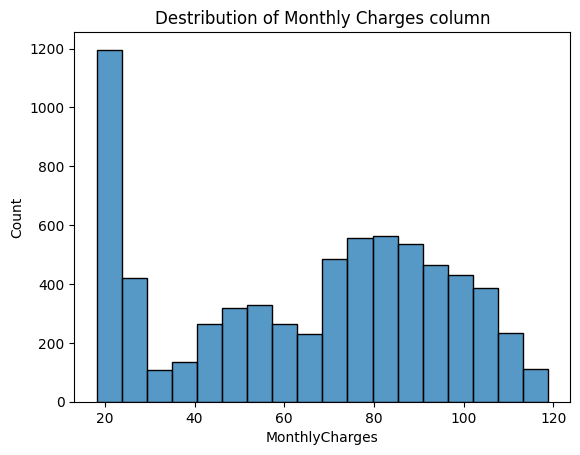

In [ ]:
sns.histplot(df['MonthlyCharges'])
plt.title('Destribution of Monthly Charges column')
plt.show()

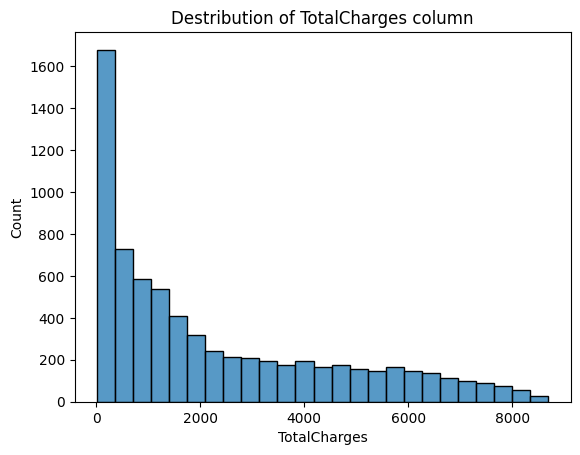

In [ ]:
sns.histplot(df['TotalCharges'])
plt.title('Destribution of TotalCharges column')
plt.show()

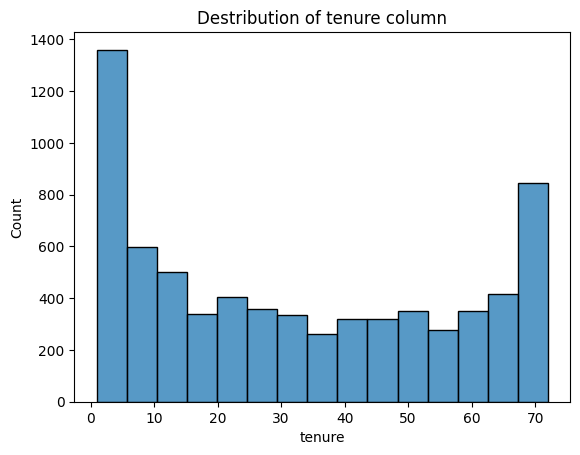

In [ ]:
sns.histplot(df['tenure'])
plt.title('Destribution of tenure column')
plt.show()

In [ ]:
df[['MonthlyCharges', 'TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


In [ ]:
X = df[['MonthlyCharges', 'TotalCharges']]
X = add_constant(X)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(dict(zip(X.columns, vif)))


{'const': np.float64(5.910170082012255), 'MonthlyCharges': np.float64(1.7357656997637438), 'TotalCharges': np.float64(1.7357656997637445)}


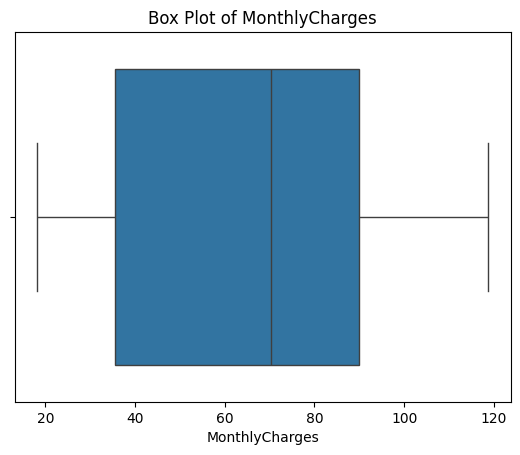

In [ ]:
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot of MonthlyCharges')
plt.show()


In [ ]:
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


df_no_outliers = df[(df['TotalCharges'] >= lower) & (df['TotalCharges'] <= upper)]

print("Before:", df.shape)
print("After:", df_no_outliers.shape)


Before: (7032, 20)
After: (7032, 20)


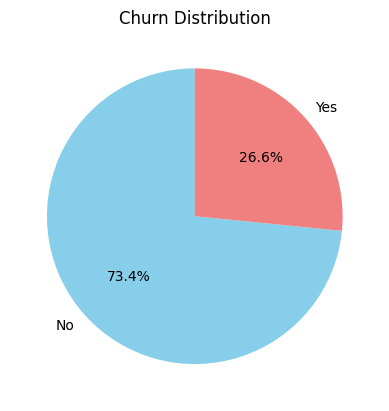

In [ ]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()


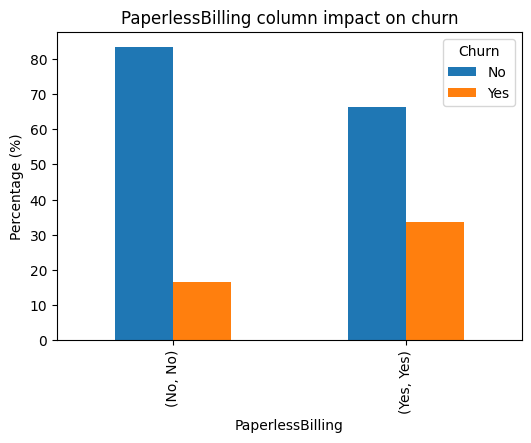

In [ ]:
# Group by and calculate percentage
df_percent = (
    df.groupby(['PaperlessBilling', 'Churn'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
)

# Plot
df_percent.plot(kind='bar', figsize=(6,4))
plt.title('PaperlessBilling column impact on churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Percentage (%)')
plt.show()


#Insights
### (1) TotalCharges column's values are right skewd, Monthly charges columns follows bymodel destribution.
### (2) MonthlyCharges and TotalCharges column Vif score is lesser than 5 so we will not face any type of multi collinearity issue
### (3) Dataset doesn't have any outliers
### (4) Dataset is imbalance it 73% 'no' and 26% 'yes'

#Feature Engineering


In [ ]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])
le=LabelEncoder()
for col in df[['gender','Churn','Partner','Dependents','PhoneService','PaperlessBilling','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']]:
    df[col] = le.fit_transform(df[col])

df['Contract'] = df['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'PaymentMethod'], drop_first=True)



In [ ]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,29.85,3.429137,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,1,0,1,0,...,56.95,7.544597,0,False,False,False,False,False,False,True
2,1,0,0,0,2,1,1,1,0,0,...,53.85,4.692723,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,1,0,1,1,...,42.30,7.518471,0,True,False,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,5.028148,1,False,False,True,False,False,True,False
5,0,0,0,0,8,1,0,0,1,0,...,99.65,6.711132,1,False,True,True,False,False,True,False
6,1,0,0,1,22,1,0,1,0,0,...,89.10,7.575790,0,False,True,True,False,True,False,False
7,0,0,0,0,10,0,1,0,0,0,...,29.75,5.713403,0,True,False,False,False,False,False,True
8,0,0,1,0,28,1,0,0,1,1,...,104.80,8.021929,1,False,True,True,False,False,True,False
9,1,0,0,1,62,1,1,1,0,0,...,56.15,8.157356,0,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Streaming

#Insights
### (1) TotalCharges column was right skewd so applied log transformation to make in Normal destribution
### (2) 'gender','Churn','Partner','Dependents','PhoneService','PaperlessBilling','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies' columns have simple 'yes' and 'no' unique values so applied only label encoding on them
###(3) Contract column have heirarchal values so applied manual encoding
###(4) columns 'MultipleLines', 'InternetService', 'PaymentMethod' neither have heirarchal values nor it has simple yes or no. Applied One-hot encoding.

#Model selection and train test split

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

In [ ]:
x_train=train.drop('Churn',axis=1)
x_test=test.drop('Churn',axis=1)
y_train=train['Churn']
y_test=test['Churn']

In [ ]:
dt_model= DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train,y_train)
dt_model.fit(x_train,y_train)
y_lr=lr_model.predict(x_test)
y_dt=dt_model.predict(x_test)

In [ ]:
f1_dt=f1_score(y_test,y_dt)
f1_lr=f1_score(y_test,y_lr)


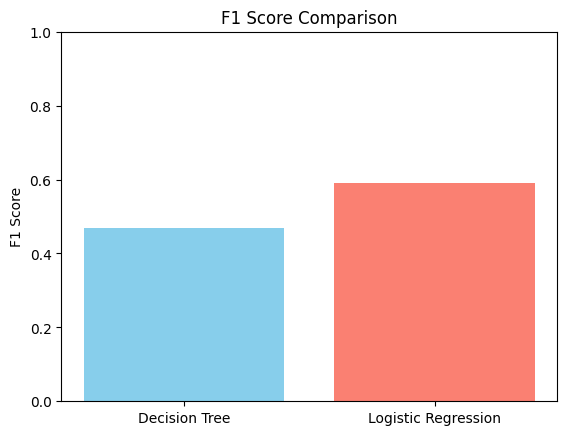

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Logistic Regression']
f1_scores = [f1_dt, f1_lr]

plt.bar(models, f1_scores, color=['skyblue', 'salmon'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()


In [ ]:
print(f1_lr)

0.5892597968069666


#Insights
### (1) Choses Logistic regression model and Decision tree classifier for better interpretability and fast work
### (2) Because dataset had imbalance value so f1_score could be better for accuracy checking
### (3) Logistic Regression model performed better here. Reasons could be that dataset was small in size and also because feature and target variable more linear relationship

#Hyperparameter Tuning

In [ ]:
lr2=LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid = GridSearchCV(
    estimator=lr2,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(x_train,y_train)
y_grid=grid.predict(x_test)
f1_grid=f1_score(y_test,y_grid)
print(f"After Hyperparemeter tuning predict is {f1_grid}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
After Hyperparemeter tuning predict is 0.584070796460177


#Insights
### Tried hyperparameter tuning by using grid search cv but it doesn't improved accuracy

In [ ]:
Git Hub project link =https://github.com/GitExplorer88/Assesment-Project
Readme file link = https://github.com/GitExplorer88/Assesment-Project/blob/main/README.md